In [14]:

import pandas as pd

jan_file =  'data/yellow_tripdata_2023-01.parquet'

df = pd.read_parquet(jan_file, engine='pyarrow')




In [15]:
df['pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['drop_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])


#ride duration in minutes
df['duration'] = (df['drop_datetime'] - df['pickup_datetime']).dt.total_seconds() / 60

df['duration'].std()

np.float64(42.59435124195458)

In [16]:
jan_trips = df[df['tpep_pickup_datetime'].dt.month == 1]

# Calculate the standard deviation of the ride durations in January.
std_duration = jan_trips['duration'].std()

print("Ride durations (in minutes):")
print(jan_trips[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'duration']])
print("\nStandard deviation of trips duration in January:", std_duration)



Ride durations (in minutes):
        tpep_pickup_datetime tpep_dropoff_datetime   duration
0        2023-01-01 00:32:10   2023-01-01 00:40:36   8.433333
1        2023-01-01 00:55:08   2023-01-01 01:01:27   6.316667
2        2023-01-01 00:25:04   2023-01-01 00:37:49  12.750000
3        2023-01-01 00:03:48   2023-01-01 00:13:25   9.616667
4        2023-01-01 00:10:29   2023-01-01 00:21:19  10.833333
...                      ...                   ...        ...
3066761  2023-01-31 23:58:34   2023-02-01 00:12:33  13.983333
3066762  2023-01-31 23:31:09   2023-01-31 23:50:36  19.450000
3066763  2023-01-31 23:01:05   2023-01-31 23:25:36  24.516667
3066764  2023-01-31 23:40:00   2023-01-31 23:53:00  13.000000
3066765  2023-01-31 23:07:32   2023-01-31 23:21:56  14.400000

[3066718 rows x 3 columns]

Standard deviation of trips duration in January: 42.58564176427416


In [17]:
filtered_trips = jan_trips[(jan_trips['duration'] >= 1) & (jan_trips['duration'] <= 60)]


original_count = len(jan_trips)

filtered_trips = jan_trips[(jan_trips['duration'] >= 1) & (jan_trips['duration'] <= 60)]

filtered_count = len(filtered_trips)

fraction_remaining = filtered_count / original_count if original_count > 0 else 0

print(f"Original count: {original_count}")
print(f"Filtered count: {filtered_count}")
print(f"Fraction remaining: {fraction_remaining}")

Original count: 3066718
Filtered count: 3009136
Fraction remaining: 0.9812235751705896


In [1]:
#one hot encoding
from sklearn.feature_extraction import DictVectorizer

import pandas as pd

jan_file =  'data/yellow_tripdata_2023-01.parquet'

df = pd.read_parquet(jan_file, engine='pyarrow')

df_subset = df[['PULocationID', 'DOLocationID']].copy() 
df_subset['PULocationID'] = df_subset['PULocationID'].astype(str)
df_subset['DOLocationID'] = df_subset['DOLocationID'].astype(str)

#convert dataframe to list of dictionaries
records = df_subset.to_dict(orient='records')

dv = DictVectorizer()

feature_matrix = dv.fit_transform(records)

num_columns = feature_matrix.shape[1]

print("Feature matrix shape:", feature_matrix.shape)
# print("Feature names:", dv.get_feature_names_out())
# print("Dimensionality (number of columns):", num_columns)


Feature matrix shape: (3066766, 518)


In [4]:
#one hot encoding
from sklearn.feature_extraction import DictVectorizer

import pandas as pd

jan_file =  'data/yellow_tripdata_2023-01.parquet'

df = pd.read_parquet(jan_file, engine='pyarrow')

df_subset = df[['PULocationID', 'DOLocationID']].copy() 
df_subset['PULocationID'] = df_subset['PULocationID'].astype(str)
df_subset['DOLocationID'] = df_subset['DOLocationID'].astype(str)

#convert dataframe to list of dictionaries
records = df_subset.to_dict(orient='records')

dv = DictVectorizer()

feature_matrix = dv.fit_transform(records)

num_columns = feature_matrix.shape[1]

print("Feature matrix shape:", feature_matrix.shape)
# print("Feature names:", dv.get_feature_names_out())
# print("Dimensionality (number of columns):", num_columns)


Feature matrix shape: (3066766, 518)


In [3]:
# 5: Now let's use the feature matrix from the previous step to train a model. Train a plain linear regression model with default parameters,
#where duration is the response variable Calculate the RMSE of the model on the training data What's the RMSE on train?

import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Load Jan 
df_jan = pd.read_parquet('data/yellow_tripdata_2023-01.parquet', engine='pyarrow')
print(df_jan.columns)

df_jan['pickup_datetime'] = pd.to_datetime(df_jan['tpep_pickup_datetime'])
df_jan['drop_datetime'] = pd.to_datetime(df_jan['tpep_dropoff_datetime'])
df_jan['duration'] = (df_jan['drop_datetime'] - df_jan['pickup_datetime']).dt.total_seconds() / 60
df_jan = df_jan[(df_jan['duration'] >= 1) & (df_jan['duration'] <= 60)]
df_jan[['PULocationID', 'DOLocationID']] = df_jan[['PULocationID', 'DOLocationID']].astype(str)

# 2. Vectorize features
dv = DictVectorizer(sparse=True)
X_train = dv.fit_transform(df_jan[['PULocationID', 'DOLocationID']].to_dict(orient='records'))
y_train = df_jan['duration'].values

# 3. Train model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Evaluate on train
y_pred_train = model.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("✅ RMSE on training (Jan):", rmse_train)


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')
✅ RMSE on training (Jan): 7.649261932106969


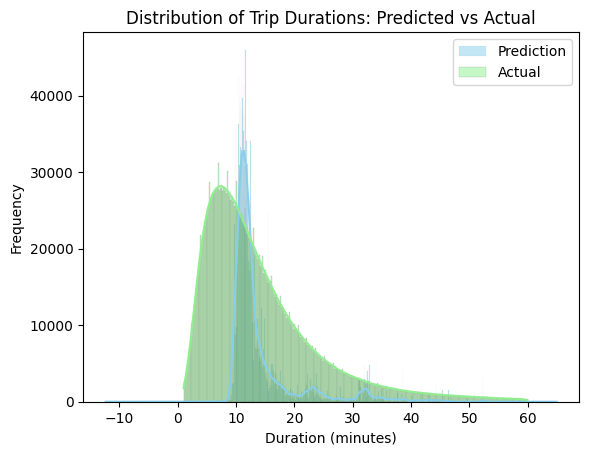

In [4]:
# import seaborn as sns
# sns.distplot(y_pred_train, label='prediction')
# sns.distplot(y_train, label='actual')

# plt.legend()
# import seaborn as sns
# sns.distplot(y_pred_train, label='prediction')
# sns.distplot(y_train, label='actual')

# plt.legend()

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(y_pred_train, label='Prediction', color='skyblue', kde=True)
sns.histplot(y_train, label='Actual', color='lightgreen', kde=True)

plt.legend()
plt.title("Distribution of Trip Durations: Predicted vs Actual")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()

In [3]:
# 5. Load and prepare Feb data (but DON'T fit a new vectorizer or model!)
df_feb = pd.read_parquet('data/yellow_tripdata_2023-02.parquet',engine='pyarrow')
df_feb['pickup_datetime'] = pd.to_datetime(df_feb['tpep_pickup_datetime'])
df_feb['drop_datetime'] = pd.to_datetime(df_feb['tpep_dropoff_datetime'])
df_feb['duration'] = (df_feb['drop_datetime'] - df_feb['pickup_datetime']).dt.total_seconds() / 60
df_feb = df_feb[(df_feb['duration'] >= 1) & (df_feb['duration'] <= 60)]
df_feb[['PULocationID', 'DOLocationID']] = df_feb[['PULocationID', 'DOLocationID']].astype(str)

#6 Transform Feb features using the same Dictvectorizer, we use only transform
X_val = dv.transform(df_feb[['PULocationID', 'DOLocationID']].to_dict(orient='records'))
y_val = df_feb['duration'].values

#7. Predict using model trained on Jan
y_pred_val = model.predict(X_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
print("✅ RMSE on training (Jan):", rmse_val)


✅ RMSE on training (Jan): 7.811818743246608
